In [ ]:
!pip install fastai==1.0.52
from fastai.text import *

## Preparing the data

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
path = Path(os.getcwd())
path = path/'gdrive'/'My Drive'
pt=path/'Thesis Data'/'full doc csv'
dt=path/'Thesis Data'/'Our dataset'

### See and clean dataset (no rerun)

In [0]:
pt=path/'Thesis Data'/'full doc csv'
train=pd.read_csv(pt/'full_doc_train.csv').dropna()
test=pd.read_csv(pt/'full_doc_test.csv').dropna()

In [0]:
def falao(s):
    if s==None:
        return None
    if len(s)<5:
        return None
    else:
        return s

In [0]:
print(len(train))
train.text = train.text.apply(falao)
train = train.dropna()
print(len(train))

print(len(test))
test.text = test.text.apply(falao)
test = test.dropna()
print(len(test))

81670
76718
20422
19137


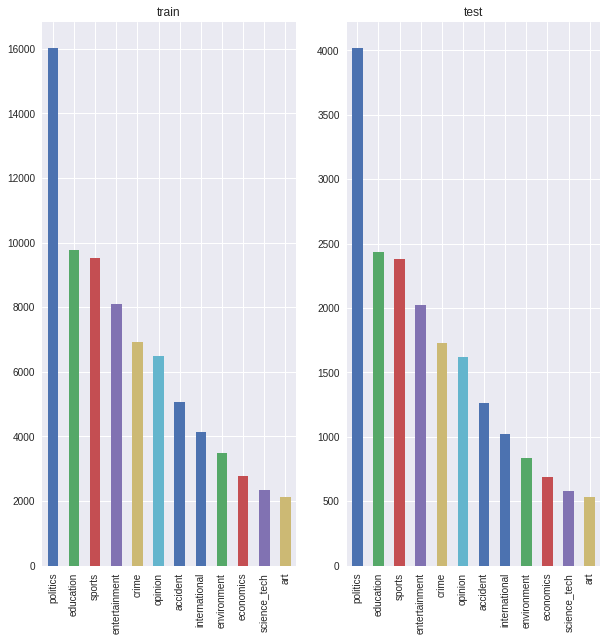

In [0]:
fig, ax = plt.subplots(1,2,figsize=(10,10))
train.label.value_counts().plot("bar", ax=ax[0]).set_title('train')
test.label.value_counts().plot("bar", ax=ax[1]).set_title('test')
fig.show()

In [0]:
train['is_valid']=False
train=train[['label','text','is_valid']]

test['is_valid']=True
test=test[['label','text','is_valid']]

train.to_csv(pt/'full_doc_train.csv',index=False)
test.to_csv(pt/'full_doc_test.csv',index=False)

In [0]:
## full dataset (for LM)
df = train.append(test,ignore_index=True)
df.to_csv(pt/'full_doc.csv',index=False)

In [0]:
df = pd.read_csv(pt/'full_doc.csv')
df.head()

In [0]:
dt=path/'Thesis Data'/'Our dataset'
train=pd.read_csv(dt/'OurDataset_train.csv').dropna()
test=pd.read_csv(dt/'OurDataset_test.csv').dropna()
df=train.append(test,ignore_index=True)
df=df[['label','text','is_valid']]
df.to_csv(dt/'full.csv',index=False)
df.head()

,label,text,is_valid
0,manik_bandhopaddhay,চাহিয়া থাকে। একজন স্ত্রীলোককে পাওয়ার লোভে তার ...,False
1,manik_bandhopaddhay,"বীভৎস অস্বাভাবিকতার সিন্ধু খুঁজিয়া মেলে, রোমাঞ...",False
2,manik_bandhopaddhay,"আছে। ধাক্কা দেওয়ার, গা মাড়াইয়া দেওয়ার বচসা আর ...",False
3,manik_bandhopaddhay,উপর সদানন্দের অনুপ্রেরণা। একটা গৰ্জনের মতো আওয়...,False
4,manik_bandhopaddhay,"প্রমাণ নয়? ভাবিতে ভাবিতে বিভূতি বুঝিতে পারি, ম...",False


## Language model

Note that language models can use a lot of GPU, so you may need to decrease batchsize here.

In [0]:
bs=32

In [0]:
# data_lm = (TextList.from_csv(path,'texts.csv', cols='text')
#            #Inputs: all the text files in path
#             .split_by_rand_pct(0.1)
#            #We randomly split and keep 10% for validation
#             .label_for_lm()           
#            #We want to do a language model so we label accordingly
#             .databunch(bs=bs))
# data_lm.save(path/'data_lm.pkl')

In [0]:
# Language model data
data_lm = TextLMDataBunch.from_csv(pt, 'full_doc.csv', bs=bs)
data_lm.save('full_doc_data_lm.pkl')

In [0]:
# Language model data AA
data_lm_AA = TextLMDataBunch.from_csv(dt, 'full.csv', vocab=data_lm.train_ds.vocab, bs=bs)
data_lm_AA.save('full_AA_data_lm.pkl')

In [0]:
# f = pd.read_csv(dt/'OurDataset_train.csv')
# print(len(f))
# f=f[['label','text','is_valid']]
# f = f.dropna()
# print(len(f))
# f.to_csv(dt/'OurDataset_train.csv',index = None)
# f = pd.read_csv(dt/'OurDataset_train.csv')
# f.head()

In [0]:
# f = pd.read_csv(dt/'OurDataset_test.csv')
# f = f.sample(frac=1).reset_index(drop=True)
# f.to_csv(dt/'OurDataset_test.csv',index = None)

# f = pd.read_csv(dt/'OurDataset_train.csv')
# f = f.sample(frac=1).reset_index(drop=True)
# f.to_csv(dt/'OurDataset_train.csv',index = None)

In [0]:
# Classifier model data AA
data_clas = TextClasDataBunch.from_csv(dt, 'OurDataset_train.csv', vocab=data_lm.train_ds.vocab, bs=bs)
data_clas.save('AA_data_clas.pkl')

In [5]:
data_lm = load_data(pt, 'full_doc_data_lm.pkl',bs=bs)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'torch.nn.modules.loss.CrossEntropyLoss' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [0]:
data_lm_AA = load_data(dt, 'full_AA_data_lm.pkl',bs=bs)

In [0]:
data_clas = load_data(dt, 'AA_data_clas.pkl', bs=bs)

### Explore Data

In [0]:
data_lm.show_batch()

idx,text
0,থানার xxunk xxunk এলাকা োথেক বৃহઍপিতবার সকােল এক পুিলশ xxunk লাশ উਤার করা হেয়েছ৷ পুিলেশর ধারণা৴ তােক হতઘা করা হেয়েছ৷ xxunk নাম োমাহাઃমদ ইিਨস xxunk িতিন xxunk োজলার পুিলশ xxunk xxunk ( নਹর - xxunk ) িহসােব কমગরত িছেলন৷ xxunk থানার এসআই xxunk আহেমদ জানান৴ বািড়েত যাওয়ার পেথ োকউ তােক খুন কের xxunk xxunk এলাকায় xxunk োফেল োগেছ৷ িনহেতর xxunk xxunk োজলা পুিলশ xxunk িচিঠ পাওয়া োগেছ৷ এস আই
1,"নভেম্বর ০২ ( বিডিনিউজ টোয়েন্টিফোর ডটকম)- নারী ও শিশু নির্যাতন দমন আইন সংশোধন করে নারী উত্ত্যক্তকারীদের কঠোর সাজার ব্যবস্থা করার দাবি জানিয়েছে আট নারী সংগঠন । মঙ্গলবার রিপোর্টার্স ইউনিটিতে এক সংবাদ সম্মেলনে এ দাবি জানায় আইন ও সালিস কেন্দ্র , ব্রাক , ব্লাস্ট , কর্মজীবী নারী , মহিলা পরিষদ , নিজেরা করি , নাগরিক উদ্যোগ এবং স্টেপস xxunk ডেভেলপমেন্ট । সংবাদ সম্মেলনে লিখিত xxunk আইন ও সালিশ কেন্দ্রের ("
2,"অনার্স কোর্স ছিল তিন বছর মেয়াদি , সেখানে বর্তমানে তিন ও চার বছর মেয়াদি ডিগ্রি ও অনার্স কোর্স চালু হয়েছে । আর তার সঙ্গে রাজনৈতিক অস্থিরতা ছাড়াও বিভিন্ন কারণে সেশনজট তো আছে । এসব কারণে জাতীয় বিশ্ববিদ্যালয় থেকে লেখাপড়া শেষ করে বের হতেই বয়স ৩০ বছরের বেশি বা কাছাকাছি হয়ে যায় , তার পরে যেকোনো xxunk সারা শিক্ষাজীবনে দুই - এক বছর গ্যাপ পড়লে তার প্রকৃত পক্ষে আর সরকারি"
3,"৭৪ পয়েন্ট বেশি । ওই সময় পর্যন্ত ৩৬৪ কোটি ৯৫ লাখ টাকার শেয়ার হাতবদল হয়েছে , যা গত কয়েকদিনের চেয়ে বেশি । গত দিন মোট লেনদেনের পরিমাণ ছিলো ৩১৩ কোটি টাকা । লেনদেন হওয়া xxunk কোম্পানির শেয়ারের দামই বেড়েছে , কমেছে ১১টির । বাজারে এ চাঙাভাব বিনিয়োগকারীদের আস্থার ফেরার লক্ষণ বলে মনে করছেন সংশ্লিষ্টরা । বিডিনিউজ টোয়েন্টিফোর ডটকম এর প্রধান অর্থনৈতিক প্রতিবেদক আবদুর রহিম হারমাছি তাৎক্ষণিক xxunk বলেন ,"
4,"বাস্তবতা হলো , আমাদের প্রথমে দ্বিতীয় পর্বে ( কোয়ার্টার ফাইনাল ) যাওয়ার চিন্তাই করা উচিত । সেদিকে xxunk আমরা সবকিছু করছি।’ \r \n xxbos রংপুর , মে ২৬ ( বিডিনিউজ টোয়েন্টিফোর ডটকম)- সিটি কর্পোরেশন ঘোষণা করে আগামী বাজেটে এজন্য প্রয়োজনীয় অর্থ বরাদ্দের দাবিতে হরতালের আগের দিন সড়ক ও রেলপথ অবরোধ কর্মসূচি পালিত হয়েছে রংপুরে । শনিবার দুপুরে রংপুর শহরতলীর বিনোদপুর রেলক্রসিংয়ে ঢাকা-রংপুর মহাসড়কে ও রেলপথ অবরোধ কর্মসূচি পালন করে"


We can then put this in a learner object very easily with a model loaded with the pretrained weights. They'll be downloaded the first time you'll execute the following line and stored in `~/.fastai/models/` (or elsewhere if you specified different paths in your config file).

## LM Start

### step 1

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, pretrained=False, drop_mult=0.5)

In [0]:
# learn.model

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


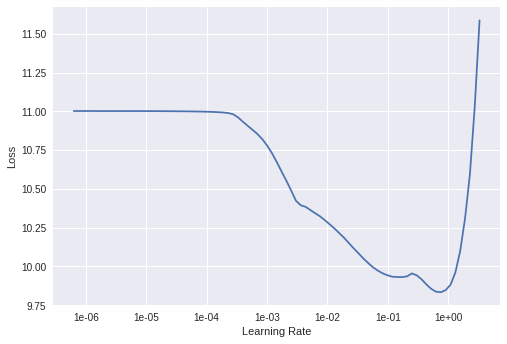

In [0]:
learn.recorder.plot()

#### epochs

epoch,train_loss,valid_loss,accuracy,time
0,4.843805,4.740394,0.292346,2:05:29


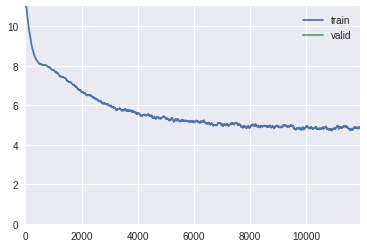

In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('full_doc_lm'); #1st

epoch,train_loss,valid_loss,accuracy,time
0,4.451422,4.428603,0.317231,1:49:05


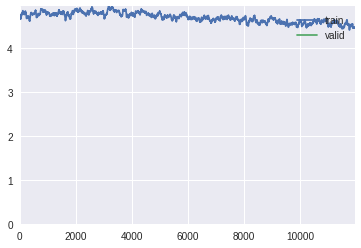

In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('full_doc_lm'); #2nd

epoch,train_loss,valid_loss,accuracy,time
0,4.271491,4.290177,0.329496,1:49:06


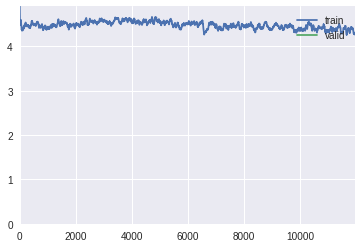

In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('full_doc_lm'); #3rd

epoch,train_loss,valid_loss,accuracy,time
0,4.429158,4.212704,0.337159,1:49:25


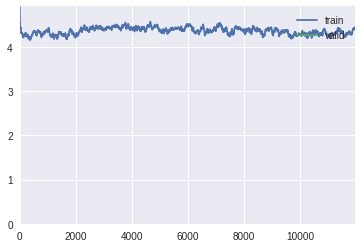

In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('full_doc_lm'); #4th

epoch,train_loss,valid_loss,accuracy,time
0,4.242722,4.164794,0.342244,1:49:30


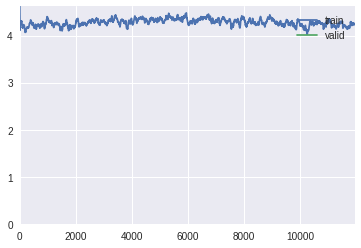

In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('full_doc_lm'); #5th

epoch,train_loss,valid_loss,accuracy,time
0,4.538415,4.438245,0.309874,1:58:47


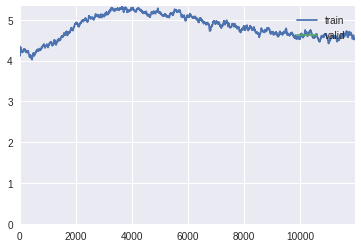

In [0]:
# learn.fit_one_cycle(1, 1e-2)
# learn.save('full_doc_lm_lr2'); #oops, restore to prev version

epoch,train_loss,valid_loss,accuracy,time
0,4.174669,4.115904,0.346226,1:58:41


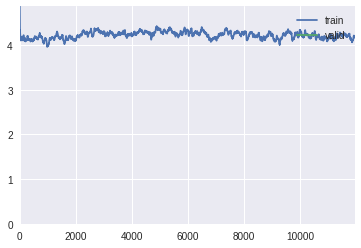

In [0]:
learn.load('full_doc_lm');
learn.fit_one_cycle(1, 1e-3)  #6th epoch
learn.save('full_doc_lm');

epoch,train_loss,valid_loss,accuracy,time
0,4.100557,4.072452,0.349533,1:58:46


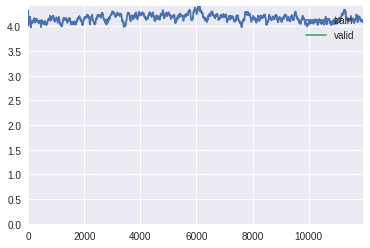

In [0]:
learn.fit_one_cycle(1, 1e-3)  #7th epoch
learn.save('full_doc_lm');

epoch,train_loss,valid_loss,accuracy,time
0,4.091215,4.042947,0.351863,1:59:01


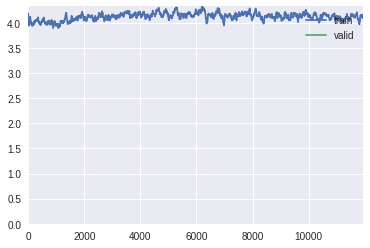

In [0]:
learn.fit_one_cycle(1, 1e-3)  #8th epoch
learn.save('full_doc_lm');

epoch,train_loss,valid_loss,accuracy,time
0,4.016239,4.018003,0.353910,1:55:07


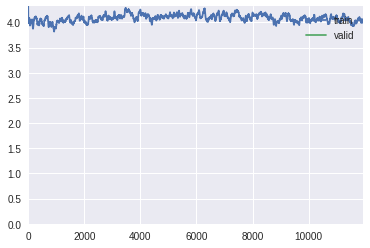

In [0]:
learn.fit_one_cycle(1, 1e-3)  #9th epoch
learn.save('full_doc_lm');

In [0]:
# learn.fit_one_cycle(1, slice(1e-3,1e-2))  #oops again
# learn.save('full_doc_lm_lrs');

epoch,train_loss,valid_loss,accuracy,time
0,4.158436,3.998608,0.355596,1:55:10


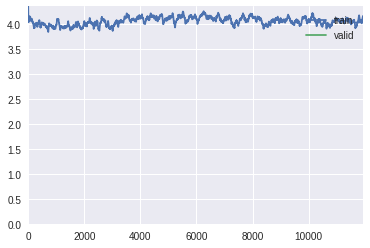

In [0]:
learn.fit_one_cycle(1, 1e-3) #10th epoch
learn.save('full_doc_lm');

epoch,train_loss,valid_loss,accuracy,time
0,4.110145,3.982155,0.356886,1:56:16


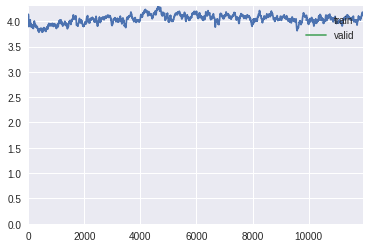

In [0]:
learn.fit_one_cycle(1, 1e-3) #11th epoch
learn.save('full_doc_lm');

epoch,train_loss,valid_loss,accuracy,time
0,4.079539,3.967628,0.358229,1:56:14


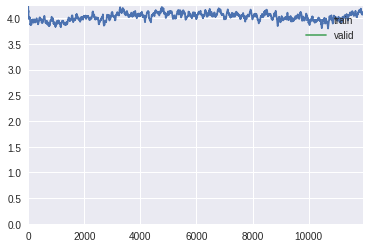

In [0]:
learn.fit_one_cycle(1, 1e-3) #12th epoch
learn.save('full_doc_lm');

In [0]:
exp(3.967628)

52.85900047039924

epoch,train_loss,valid_loss,accuracy,time
0,4.017712,3.955716,0.359309,1:53:57


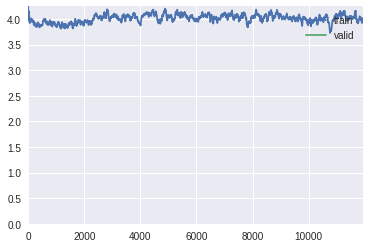

In [0]:
learn.fit_one_cycle(1, 1e-3) #13th epoch
learn.save('full_doc_lm');

epoch,train_loss,valid_loss,accuracy,time
0,3.892953,3.945857,0.360266,1:53:50


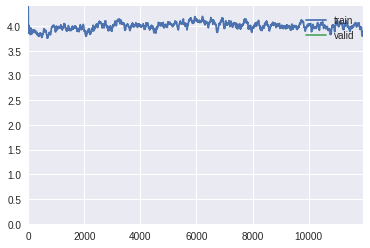

In [0]:
learn.fit_one_cycle(1, 1e-3) #14th epoch
learn.save('full_doc_lm');

epoch,train_loss,valid_loss,accuracy,time
0,4.017687,3.935934,0.361111,1:53:55


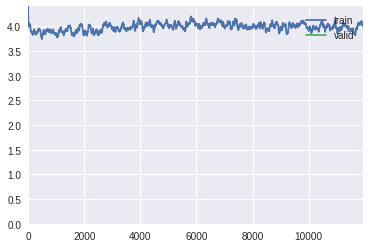

In [0]:
learn.fit_one_cycle(1, 1e-3) #15th epoch
learn.save('full_doc_lm');

In [0]:
exp(3.935934)

51.20995772747041

In [0]:
learn.load('full_doc_lm');

In [0]:
learn.fit_one_cycle(1, 1e-3) #16th epoch
learn.save('word_news_lm_16');

epoch,train_loss,valid_loss,accuracy,time
0,3.923908,3.926655,0.362075,59:55


In [0]:
learn.fit_one_cycle(1, 1e-3) #17th epoch
learn.save('word_news_lm_17');

epoch,train_loss,valid_loss,accuracy,time
0,3.963646,3.919847,0.362716,1:00:18


In [0]:
learn.fit_one_cycle(1, 1e-3) #18th epoch
learn.save('word_news_lm_18');

epoch,train_loss,valid_loss,accuracy,time
0,3.959783,3.912029,0.363435,1:00:18


In [0]:
learn.fit_one_cycle(1, 1e-3) #19th epoch
learn.save('word_news_lm_19');

epoch,train_loss,valid_loss,accuracy,time
0,3.898952,3.907198,0.364066,1:00:16


In [0]:
learn.fit_one_cycle(1, 1e-3) #20th epoch
learn.save('word_news_lm_20');

epoch,train_loss,valid_loss,accuracy,time
0,3.954219,3.900178,0.364665,1:00:11


In [0]:
learn.fit_one_cycle(1, 1e-3) #21th epoch
learn.save('word_news_lm_21');

epoch,train_loss,valid_loss,accuracy,time
0,3.958878,3.894429,0.365300,1:00:07


In [0]:
learn.fit_one_cycle(1, 1e-3) #22th epoch
learn.save('word_news_lm_22');

epoch,train_loss,valid_loss,accuracy,time
0,3.875553,3.891065,0.365618,1:00:11


In [0]:
learn.fit_one_cycle(1, 1e-3) #23th epoch
learn.save('word_news_lm_23');

epoch,train_loss,valid_loss,accuracy,time
0,3.928270,3.886885,0.365921,1:00:17


In [0]:
learn.fit_one_cycle(1, 1e-3) #24th epoch
learn.save('word_news_lm_24');

epoch,train_loss,valid_loss,accuracy,time
0,3.925411,3.882998,0.366440,1:00:12


In [0]:
learn.fit_one_cycle(1, 1e-3) #25th epoch
learn.save('word_news_lm_25');

epoch,train_loss,valid_loss,accuracy,time
0,3.928081,3.877895,0.366900,1:00:13


In [0]:
learn.fit_one_cycle(1, 1e-3) #26th epoch
learn.save('word_news_lm_26');

epoch,train_loss,valid_loss,accuracy,time
0,3.840228,3.874800,0.367195,1:00:20


In [7]:
learn.load('word_news_lm_26');
learn.fit_one_cycle(1, 1e-3) #27th epoch
learn.save('word_news_lm_27');

epoch,train_loss,valid_loss,accuracy,time
0,3.850721,3.870495,0.367742,1:01:23


In [8]:
learn.fit_one_cycle(1, 1e-3) #28th epoch
learn.save('word_news_lm_28');

epoch,train_loss,valid_loss,accuracy,time
0,3.905784,3.866856,0.368077,1:01:33


In [9]:
learn.fit_one_cycle(1, 1e-3) #29th epoch
learn.save('word_news_lm_29');

epoch,train_loss,valid_loss,accuracy,time
0,3.924835,3.864040,0.368324,1:01:38


In [10]:
learn.fit_one_cycle(1, 1e-3) #30th epoch
learn.save('word_news_lm_30');

epoch,train_loss,valid_loss,accuracy,time
0,3.789527,3.861170,0.368736,1:01:47


To complete the fine-tuning, we can then unfeeze and launch a new training.

How good is our model? Well let's try to see what it predicts after a few given words.

In [0]:
TEXT = "তিন" #তিনি মারা গেছেন মাস তিনেক
N_WORDS = 40
N_SENTENCES = 3

In [0]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

তিন দিনের সফরে আজ মঙ্গলবার ঢাকা পৌঁছান প্রধানমন্ত্রী শেখ হাসিনা । আজ তিনি সকাল নয়টা থেকে দুপুর ১২টা পর্যন্ত এই সফরে যাবেন । গতকাল শুক্রবার সকালে প্রধানমন্ত্রীর সরকারি বাসভবন গণভবনে সাংবাদিকদের সামনে তিনি এ তথ্য জানান । খবর বাসসের । প্রধানমন্ত্রী
তিন দিনের সফরে ঢাকা এসেছিলেন বাংলাদেশের স্পিকার শিরীন শারমিন চৌধুরী । রোববার সকালে প্রধানমন্ত্রীর সঙ্গে দেখা করে তিনি প্রথম আলো হাতে তুলে দেন । প্রধানমন্ত্রীর প্রেস সচিব এ কে এম শামীম চৌধুরী সাংবাদিকদের বলেন , “ মাননীয় প্রধানমন্ত্রী এই সেতু সম্পর্কে
তিন দিনের সফরে সারা দেশে যাচ্ছেন প্রধানমন্ত্রী নরেন্দ্র মোদি । আজ সোমবার রাতে দিল্লির উদ্দেশে রওনা দেন তিনি । গতকাল বুধবার ( বৃহস্পতিবার ) রাতে ঢাকা ছাড়বে প্রধানমন্ত্রী । তাঁর সঙ্গে আছেন ভারতের সাবেক প্রধানমন্ত্রী নরেন্দ্র মোদি । এ উপলক্ষে গতকাল


We not only have to save the model, but also it's encoder, the part that's responsible for creating and updating the hidden state. For the next part, we don't care about the part that tries to guess the next word.

In [0]:
learn.save_encoder('full_doc_lm_enc')

## BAAD6 Dataset

In [0]:
aa = path/'Thesis Data'/'AA dataset'

In [0]:
# Language model data AA
data_lm_AA = TextLMDataBunch.from_csv(aa, 'ulm_train.csv', vocab=data_lm.train_ds.vocab, bs=bs)
data_lm_AA.save('bhai_AA_data_lm.pkl')

In [0]:
# Classifier model data AA
data_clas = TextClasDataBunch.from_csv(aa, 'ulm_train.csv', vocab=data_lm.train_ds.vocab, bs=bs)
data_clas.save('bhai_AA_data_clas.pkl')

In [15]:
data_clas.show_batch()

text,target
"xxbos দেখিতে xxunk xxunk একটু বড় ... লেখাটা ২০০৪ সালের অক্টোবরে লেখা । xxunk আগে একাধিকবার অনলাইনে প্রকাশিত । এই লেখাটা একাধিক কারণে আমার প্রিয় । প্রথমত , লেখাটা প্রায় এক আসনে লেখা , মাঝখানে শুধু xxunk একটু । দ্বিতীয়ত , এখন পর্যন্ত এটাই আমার xxunk xxunk ( আয়তনের দিক থেকে ) । তৃতীয়ত , এবং সবচেয়ে গুরুত্বপূর্ণ যে কারণটা , এমন একটা সময় এ লেখায় ধরে রাখা আছে ,",hm
"xxbos দেখিতে xxunk xxunk একটু বড় ... লেখাটা ২০০৪ সালের অক্টোবরে লেখা । xxunk আগে একাধিকবার অনলাইনে প্রকাশিত । এই লেখাটা একাধিক কারণে আমার প্রিয় । প্রথমত , লেখাটা প্রায় এক আসনে লেখা , মাঝখানে শুধু xxunk একটু । দ্বিতীয়ত , এখন পর্যন্ত এটাই আমার xxunk xxunk ( আয়তনের দিক থেকে ) । তৃতীয়ত , এবং সবচেয়ে গুরুত্বপূর্ণ যে কারণটা , এমন একটা সময় এ লেখায় ধরে রাখা আছে ,",hm
"xxbos চাহিদাপত্র ১ . মকবুল স্ক্রিন থেকে চোখ সরিয়ে পর্যবেক্ষণ ডেস্ক থেকে উঠে xxunk । তার মাথা টিপটিপ করে xxunk করছে , শরীরের কোষগুলো একটু পর পর যেন বিড়বিড় করে বলছে , এক কাপ কফি খাওয়া দরকার । xxunk "" xxunk "" একটা ছোটো xxunk , সর্বোচ্চ চারজন xxunk জন্যে তৈরি করা । কিন্তু মকবুলের মিশন xxunk । শুধু xxunk নয় , ফেলে আসা পৃথিবীর সাথে xxunk । আরও তিন",hm
"xxbos আবাহন ১ . "" উনি একজন xxunk ছিলেন । "" শামীমের কণ্ঠস্বরে xxunk কোনো কমতি রইলো না । সোমা একটু শাসন করার চেষ্টা করলো স্বামীকে , "" নিজের দাদাকে কেউ xxunk বলে এভাবে ? "" শামীম বারান্দার কাঠের xxunk পা তুলে দিয়ে xxunk করে চায়ের কাপে চুমুক দিয়ে বললো , "" এই শর্মা বলে । আর xxunk , উনি আমার আপন দাদা নন । বাবার চাচা । xxunk ।",hm
"xxbos গোয়েন্দা xxunk ও অজ্ঞান পার্টি রহস্য এক গোয়েন্দা xxunk চোখ গরম করে বললেন , "" এবারও কি সেবারের মতো দুই xxunk কেস নিয়ে হাজির হলেন নাকি ? "" পুলিশের গোয়েন্দা বিভাগের ডাকসাইটে দারোগা xxunk xxunk আধ হাত xxunk কেটে বললেন , "" আর লজ্জা দেবেন না স্যার ! এবার একদম xxunk করিয়ে তবে এসেছি । এই দেখুন আমাদের ফরেনসিক এক্সপার্ট কেমিক্যাল আলির রিপোর্ট । "" xxunk xxunk xxunk xxunk",hm


In [16]:
data_lm_AA.show_batch()

idx,text
0,"' আলী আহসান মুজাহিদ ... তুই রাজাকার ! চারিদিকে এখন যুদ্ধাপরাধী দের বিচারের xxunk মিলে আওয়াজ তুলে , বদলে দিতে xxunk আয় শাহবাগে xxunk যখন তার কাঙ্খিত কোন কিছু না পায় বা হারিয়ে ফেলে তখন উচিৎ - xxunk , মুলক - xxunk , ন্যায় - অন্যায় অনেক কিছুই চিন্তা করে । এই মূহুর্তে গোটা জাতি তথা বাঙালী একটি জিনিস হারিয়ে ফেলেছে , তা হলো সরকারের উপর আস্থা । আমার আড়াই"
1,"নেতৃত্বাধীন ২০ দলীয় জোট দায়ী । বর্তমানে দেশে যতটুকু গণতন্ত্র আছে তা কি জিয়া এরশাদের আমলে ছিল , যারা নানা xxunk বর্তমান গণতন্ত্রের ব্যাখ্যা দেন তারা একটু ভেবে দেখবেন । ১৯৭৫ - ১৯৯০ এই সময়টায় খুব লালন করে রাজনীতিতে ধর্মের ব্যবহার করা হয় । আর এই ব্যবহারের মাধ্যমে সূত্রপাত ঘটে মৌলবাদী উগ্রতা যার ফল আজকের সন্ত্রাসী কর্মকা- । জাতীয় xxunk ক্ষেত্রে নৈতিকতার বিষয়টিও দেখতে হবে , যেসব রাজনৈতিক দলে নৈতিক"
2,"করতে আমাদের উন্নয়ন অগ্রযাত্রায় আমরা এ অঞ্চলের বাকিদের এবং বিশ্বের সঙ্গে হাত মেলাতে চাই । ’ অনুরূপ বক্তব্যও উঠে এসেছে জাপান সোসাইটি বাংলাদেশ আয়োজিত শেখ হাসিনার সংবর্ধনা অনুষ্ঠানে প্রবাসী বাংলাদেশীদের কণ্ঠেও । তারাও বলেছেন , আমরা চাই বাংলাদেশ জি - ৭ এ যোগ দিয়ে সংস্থাটিকে জি - ৮ এ পরিণত করুক । জাপানের প্রধানমন্ত্রীও বাংলাদেশের অর্থনীতির অগ্রযাত্রাকে প্রশংসিত করে এক্ষেত্রে তার দেশের সহযোগিতার কথা গুরুত্ব দিয়ে বলেছেন । জি -"
3,". তোমার নাচ xxunk xxunk , হ , xxunk । xxunk বলে xxunk প্রথমে রাজী হয় না । পরে রাজী হয় । ততক্ষণে ওরা এক মাঠের মতন নির্জন স্থানে চলে এসেছে । আকাশে ও চর xxunk মাটিতে গাছপালার ওপর গভীর ছায়া পড়েছে । শিউলি খুব রেডিও শোনে । সে অনেক গান জানে । xxunk xxunk । ‘ পলাশ ডাকা কোকিল ডাকা আমার এদেশ xxunk ক্ষেতে ঢেউ খেলানো এমন কোথাও xxunk"
4,পক্ষে হলে এ কাজ xxunk কেন ? তোমার পৃথিবীতে কি মানুষকে আমার মতোই অত্যাচার করা হয় ? ' ' এখন আর করা হয় না । আপনার সব যুক্তি আমি মেনে নিচ্ছি । কিন্তু এই চান্দিনার তিরিশ হাজার মানুষের কথাও তো চিন্তা করে দেখা উচিত । ' ' চান্দিনার মানুষ আমার দাবি মেনে xxunk । ' নানা জসিম চৌধুরী খুব শান্ত গলায় বললো । ' তুমি এসে আমার একমাত্র সুযোগটা নষ্ট


#### LM

In [0]:
data_clas=load_data(aa,'bhai_AA_data_clas.pkl',bs=bs)
data_lm_AA=load_data(aa,'bhai_AA_data_lm.pkl',bs=bs)

In [0]:
learn = language_model_learner(data_lm_AA, AWD_LSTM, pretrained=False, drop_mult=0.5)

In [0]:
learn.load(pt/'models'/'word_news_lm_30');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


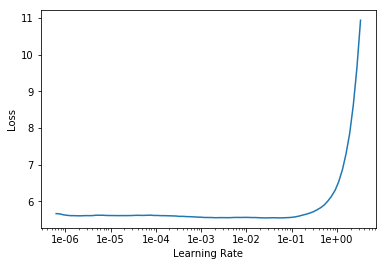

In [20]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

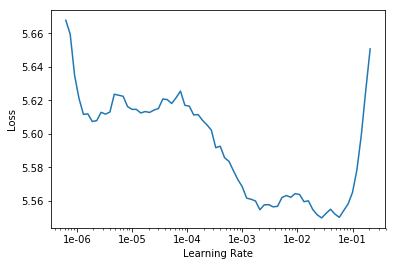

In [21]:
learn.recorder.plot(skip_end=20)

In [22]:
learn.fit_one_cycle(2, 1e-2)
learn.save('bha_AA_lm_head');

epoch,train_loss,valid_loss,accuracy,time
0,5.361306,5.348073,0.221475,03:44
1,4.899442,5.189274,0.233513,03:52


In [23]:
learn.freeze_to(-2)
learn.fit_one_cycle(2, 1e-2)
learn.unfreeze()
learn.fit_one_cycle(2, 1e-2)
learn.save('bhai_AA_lm_body')

epoch,train_loss,valid_loss,accuracy,time
0,5.234888,5.428479,0.220317,03:57
1,4.762582,5.245049,0.232745,03:57


epoch,train_loss,valid_loss,accuracy,time
0,5.440943,5.634827,0.204411,04:20
1,4.836977,5.347992,0.225980,04:20


In [24]:
learn.fit_one_cycle(4, 1e-3)
learn.save('bhai_AA_lm_body_2')

epoch,train_loss,valid_loss,accuracy,time
0,4.405888,5.346663,0.226201,04:19
1,4.362830,5.306024,0.229188,04:20
2,4.179346,5.298857,0.230915,04:20
3,4.014832,5.313752,0.230489,04:21


In [0]:
learn.save_encoder('bhai_AA_lm_enc')

#### Classifier

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


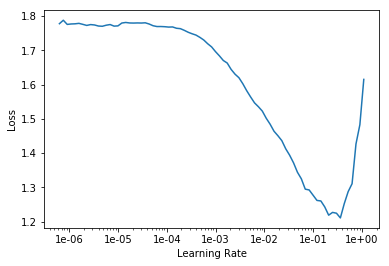

In [26]:
learn_cls = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, pretrained=False)
learn_cls.load_encoder('bhai_AA_lm_enc')
learn_cls.freeze()
learn_cls.lr_find()
learn_cls.recorder.plot()

In [27]:
learn_cls.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.817132,0.278507,0.933518,01:23
1,0.482012,0.172570,0.958449,01:37


In [0]:
learn_cls.save('bhai_cls')

In [29]:
learn_cls.freeze_to(-2)
learn_cls.fit_one_cycle(2 , slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))
learn_cls.save('bhai_cls_2')

epoch,train_loss,valid_loss,accuracy,time
0,0.356634,0.216527,0.922438,01:36
1,0.259313,0.171009,0.950139,01:41


In [30]:
learn_cls.freeze_to(-3)
learn_cls.fit_one_cycle(2 , slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))
learn_cls.save('bhai_cls_3')

epoch,train_loss,valid_loss,accuracy,time
0,0.202571,0.191210,0.939058,02:03
1,0.158585,0.133222,0.955679,01:55


In [31]:
learn_cls.unfreeze()
learn_cls.fit_one_cycle(4, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))
learn_cls.save('bhai_cls_4')

epoch,train_loss,valid_loss,accuracy,time
0,0.095013,0.122180,0.958449,02:34
1,0.078008,0.119438,0.958449,02:26
2,0.063303,0.115731,0.961219,02:21
3,0.055163,0.117248,0.961219,02:24


#### Test

In [0]:
def testing(dts):
  df = pd.read_csv(dts) 
  text_array = df["text"].tolist()
  print(len(text_array))

  final_preds = []

  for text in text_array:
      preds = learn_cls.predict(text)
      final_preds.append(str(preds[0]))

  targets = df["label"].tolist()

  err=[]
  count =0;
  tst = len(text_array)

  for i in range(tst):
      if(targets[i]==final_preds[i]):
          count = count+1
      else:
  #         print(targets[i] + ", " + final_preds[i] + ';')
          err.append((targets[i],final_preds[i]))
  print("Accuracy: ")
  print(count/tst)
  print(err)
  
  return final_preds,targets

In [33]:
pred,targ = testing(aa/'ulm_test.csv')

300
Accuracy: 
0.9466666666666667
[('rg', 'mk'), ('rn', 'ij'), ('rn', 'mk'), ('rn', 'mk'), ('rg', 'rn'), ('ij', 'rn'), ('rg', 'mk'), ('rn', 'ij'), ('rg', 'ij'), ('hm', 'mk'), ('rg', 'mk'), ('fe', 'mk'), ('rn', 'mk'), ('mk', 'fe'), ('rn', 'mk'), ('rg', 'rn')]


In [34]:
from sklearn.metrics import f1_score
out  = f1_score(targ, pred, average=None) #'macro' , also == weighted cuz dataset is balanced
out , out.mean()

(array([0.98    , 0.989899, 0.960784, 0.907407, 0.93617 , 0.907216]),
 0.9469129031072011)